DAY 23 -- Mar 19, 2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

A new **KAGGLE** data set to play with:

[House Prices: Advanced Regression Techniques:](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) *Predict sales prices and practice feature engineering, RFs, and gradient boosting*

The goal of this kaggle competition is to predict the final price of each home from 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.

### Load data

In [3]:
input_dir = "./data/"

# Load my data
train_file = os.path.join(input_dir, "train.csv")
test_file = os.path.join(input_dir, "test.csv")

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Features
At a first pass, we will only look at quantitative variables.

In [6]:
features = train.columns[train.dtypes==int]
features = [f for f in features if f not in ["Id", "SalePrice"]]

data = train[features + ["SalePrice"]]
X = train[features]
y = train["SalePrice"]

X.shape, y.shape

((1460, 33), (1460,))

### Linear regression using all quantitative features
When I think of predicting a continuous variable, I think of regression (eg. linear regression)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

clf = LinearRegression()
scores = cross_val_score(clf, X, y, cv=3)

# Print scores
print("The scores:", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

The scores: [ 0.84792899  0.78651395  0.69920021]
Accuracy: 0.78 (+/- 0.12)


### How well do the quantitative features correlate with sales price?

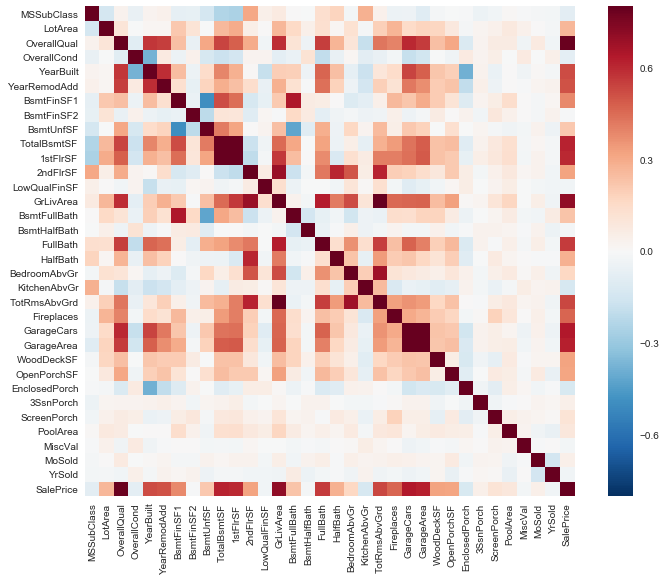

In [8]:
corrmat = data.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

- When we look at it, "OverallQual" is highly correlated with SalePrice

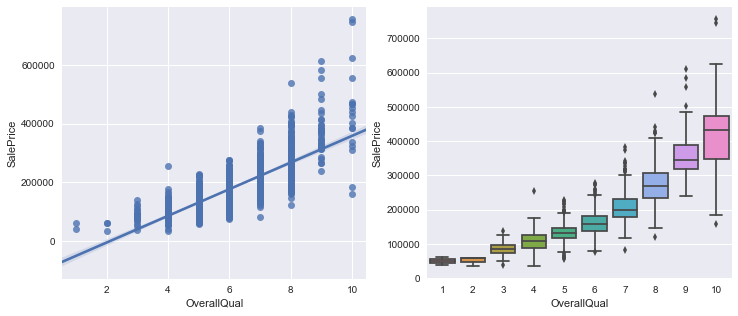

In [9]:
f, (ax1, ax2) = plt.subplots(figsize=(12, 5), ncols=2, nrows=1)
sns.regplot(x="OverallQual", y="SalePrice", data=data, ax=ax1)
sns.boxplot(x="OverallQual", y="SalePrice", data=data, ax=ax2)

In [10]:
# Predicting using only "OverallQual"
clf = LinearRegression()
scores = cross_val_score(clf, X[["OverallQual"]], y, cv=3)

# Print scores
print("The scores:", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

The scores: [ 0.65298503  0.61625302  0.60493919]
Accuracy: 0.62 (+/- 0.04)


### Considering only highly correlated features (> 0.25 or < -0.25)

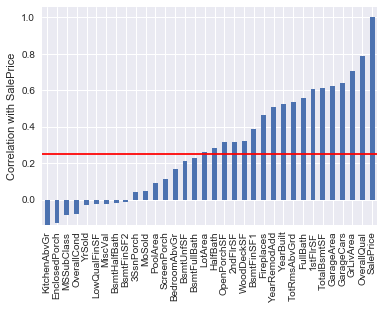

In [11]:
df = pd.DataFrame(corrmat.SalePrice.sort_values())
df.plot.bar(legend=False)
plt.ylabel("Correlation with SalePrice")
plt.hlines(y=0.25, xmin=-10, xmax=100, color="red")

In [12]:
highly_corr_features = corrmat.SalePrice.sort_values()
highly_corr_features = highly_corr_features[abs(highly_corr_features) > .25]
highly_corr_features = [f for f in highly_corr_features.index if f != 'SalePrice']
highly_corr_features

['LotArea',
 'HalfBath',
 'OpenPorchSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'Fireplaces',
 'YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

In [13]:
clf = LinearRegression()
scores = cross_val_score(clf, X[highly_corr_features], y, cv=3)

# Print scores
print("The scores:", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

The scores: [ 0.84424068  0.77671438  0.69100392]
Accuracy: 0.77 (+/- 0.13)


- Accuracy is slightly lower...